In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
import sklearn
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import preprocessing
from sklearn import utils
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.datasets import load_iris
from IPython.display import Image
from subprocess import call
from sklearn import tree
import copy
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

#for Naïve Bayes
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
#This function replaces labels, such as Jazz, Rock, Rap, etc. with numbers. Each label now carries it's own number

def stringToInt(dataFrame,col):
    test = {}
    for i in dict(enumerate(dataFrame[col].unique())).items():#is a dictionary of the keys and corespodening number
        #makes it so the keys and values of the dictionary switch
        test[i[1]]=i[0]
    print(test,'\n')
    return dataFrame[col].map(test)

def getScore(y_test,y_hat):
    labels = ['Electronic', 'Anime', 'Jazz', 'Alternative', 'Country', 'Rap', 'Blues', 'Rock', 'Classical', 'Hip-Hop']
    print((np.sum((y_test - y_hat)**2))/len(y_test) )#mean squared error
    print(classification_report(y_test, y_hat,target_names=[i+":" for i in labels]))


In [3]:
#getting dataframe
df = pd.read_csv("music_genre.csv")

#dropping columns
badInfo = ["instance_id","obtained_date","artist_name","track_name"]
df.drop(columns=badInfo,axis=1,inplace=True)

#dropping null rows
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True) #Very good practice to reset how your rows are counted when you drop rows.

#fixing the problem with 'tempo' column
df["tempo"]=df["tempo"].replace("?",np.nan)
df["tempo"] = df["tempo"].astype("float")
df["tempo"]=df.groupby("music_genre")["tempo"].transform(lambda x: x.fillna(x.mean(skipna=True)))
df['tempo'] = np.around(df['tempo'],2)

#fixing the problem with 'duration' column
df["duration_ms"]=df["duration_ms"].replace(-1.0,np.nan)
df["duration_ms"]=df.groupby("music_genre")["duration_ms"].transform(lambda x: x.fillna(x.mean(skipna=True)))
df['duration_ms'] = np.around(df['duration_ms'],2)

#changing the values from string to int
df['key'] = stringToInt(df,'key')
df['mode'] = stringToInt(df,'mode')
df['music_genre_name'] = df['music_genre']
df['music_genre'] = stringToInt(df,'music_genre')

pio.templates.default = "plotly_dark"

dfxg = copy.deepcopy(df)

{'A#': 0, 'D': 1, 'G#': 2, 'C#': 3, 'F#': 4, 'B': 5, 'G': 6, 'F': 7, 'A': 8, 'C': 9, 'E': 10, 'D#': 11} 

{'Minor': 0, 'Major': 1} 

{'Electronic': 0, 'Anime': 1, 'Jazz': 2, 'Alternative': 3, 'Country': 4, 'Rap': 5, 'Blues': 6, 'Rock': 7, 'Classical': 8, 'Hip-Hop': 9} 



In [4]:
#Setting X to be all the input columns 
X = df.loc[:,df.columns[:-2]]


#Setting y to be the desired column
y= df['music_genre']#what we want

#Splitting test and train ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Scaling X variables
sc = preprocessing.StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

#for heat map
labels = ['Electronic', 'Anime', 'Jazz', 'Alternative', 'Country', 'Rap', 'Blues', 'Rock', 'Classical', 'Hip-Hop']

In [0]:
# Classification Tree ( Test )

#target = df["music_genre"]                                                                     # The target is defined.
#x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=1) # Splits our data using the train_test_split() function on Sklearn.

tst1 = DecisionTreeClassifier(max_depth = 2, random_state = 0)
tst1.fit(X_train, y_train)

tst1.predict(X_test)

fig, axe = plt.subplots(figsize=(20,10))
tree.plot_tree(tst1, ax = axe, fontsize=15)

In [25]:
clf = DecisionTreeClassifier(max_depth = 2, random_state = 0)
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.0977


In [11]:
label_encoder = preprocessing.LabelEncoder()
df['popularity']= label_encoder.fit_transform(df['popularity'])
df['popularity'].unique()

array([27, 31, 28, 34, 32, 47, 46, 43, 39, 22, 30, 50, 59, 29, 35, 44, 33,
       56, 21, 48, 45, 53, 63, 25, 36, 37, 51, 55, 49, 41, 38, 52, 24, 42,
       26, 96, 40, 23, 61, 54, 66, 70, 67, 60, 58, 65, 69, 72, 64, 62, 57,
        0, 76, 20, 74, 71, 84, 68, 18, 82,  3, 11, 17, 15, 12, 10, 13, 16,
       14,  9, 19,  8,  7,  4,  2,  1,  5,  6, 79, 73, 75, 78, 83, 81, 80,
       77, 85, 97, 88, 87, 86, 98, 89, 93, 90, 94, 91, 95, 92])

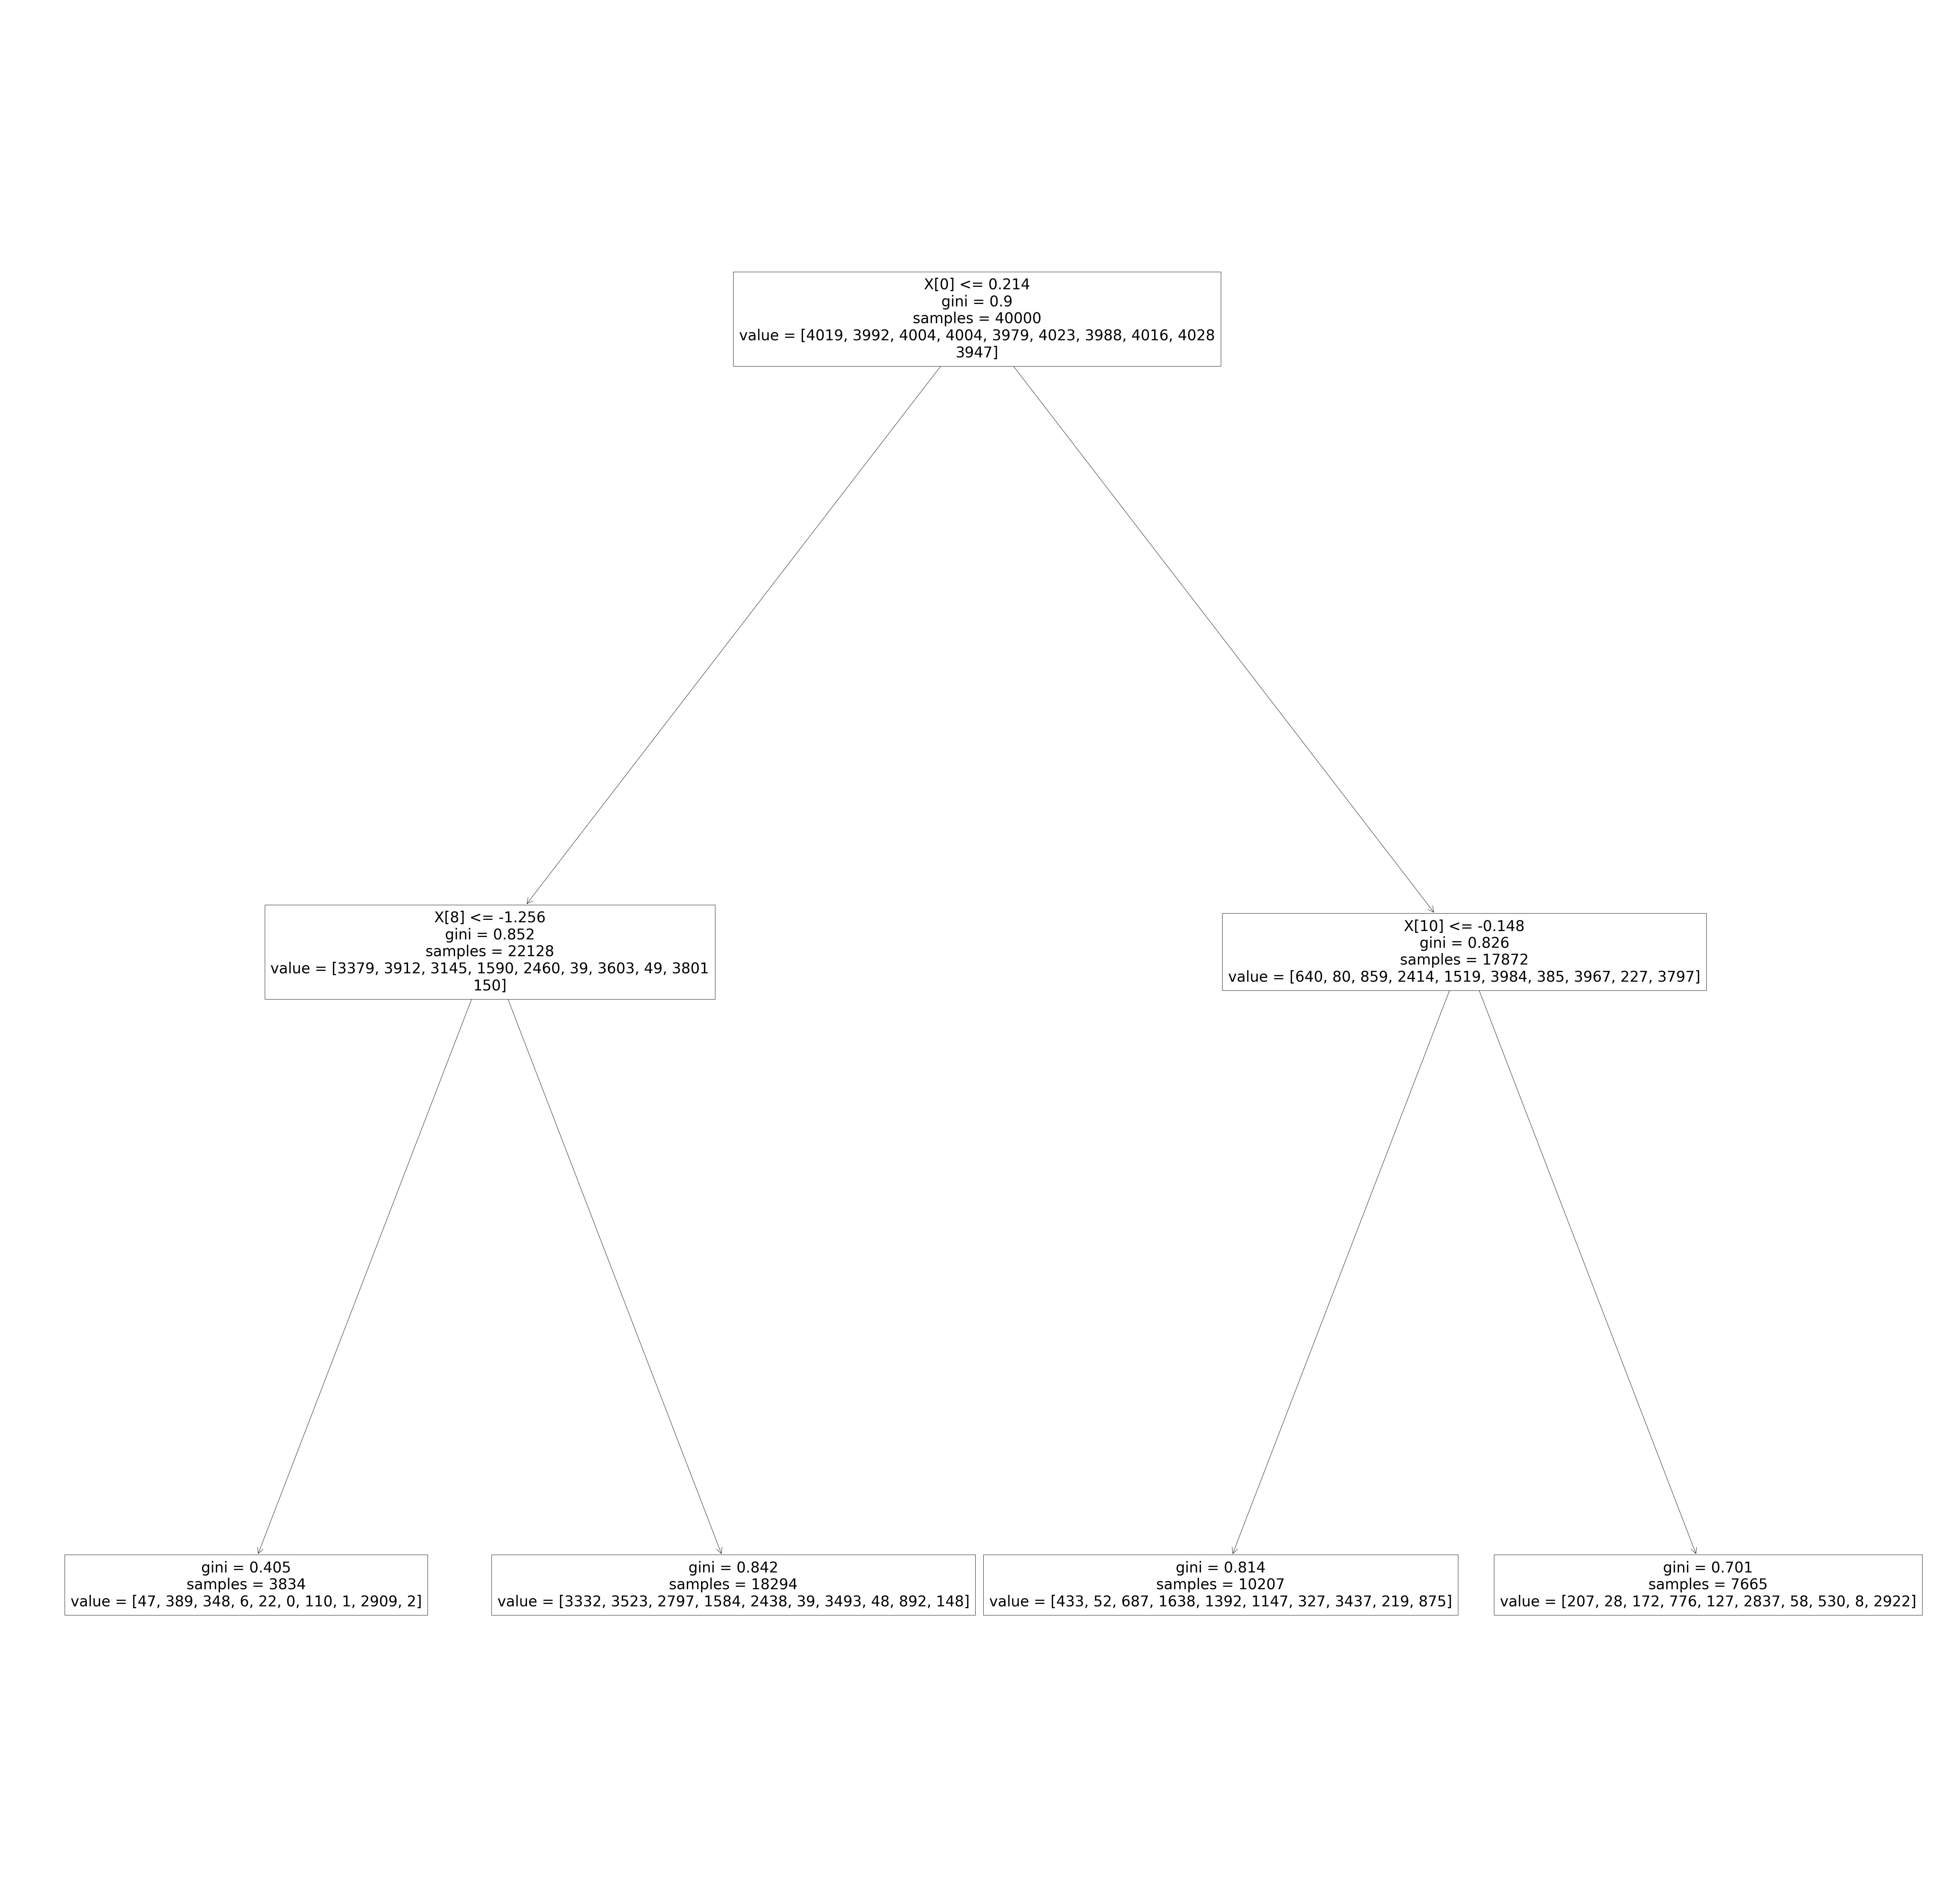

In [12]:
plt.figure(figsize=(100,100))
tree.plot_tree(clf)
plt.show()

In [13]:
tst = RandomForestClassifier(max_depth=2, random_state=0)   # RandomForestRegressor is added.
tst.fit(X_train, y_train)                                   # Fits the model.

y_pred1 = tst.predict(X_test)                               # Predicts.

getScore(y_test,y_pred1)
print("Accuracy:", accuracy_score(y_test, y_pred1))

#print("\n------------------\n")


KeyboardInterrupt: 

Accuracy: 0.3196


[Text(0.5, 0.8333333333333334, 'X[0] <= 0.214\ngini = 0.9\nsamples = 40000\nvalue = [4019, 3992, 4004, 4004, 3979, 4023, 3988, 4016, 4028\n3947]'),
 Text(0.25, 0.5, 'X[8] <= -1.256\ngini = 0.852\nsamples = 22128\nvalue = [3379, 3912, 3145, 1590, 2460, 39, 3603, 49, 3801\n150]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.405\nsamples = 3834\nvalue = [47, 389, 348, 6, 22, 0, 110, 1, 2909, 2]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.842\nsamples = 18294\nvalue = [3332, 3523, 2797, 1584, 2438, 39, 3493, 48, 892, 148]'),
 Text(0.75, 0.5, 'X[10] <= -0.148\ngini = 0.826\nsamples = 17872\nvalue = [640, 80, 859, 2414, 1519, 3984, 385, 3967, 227, 3797]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.814\nsamples = 10207\nvalue = [433, 52, 687, 1638, 1392, 1147, 327, 3437, 219, 875]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.701\nsamples = 7665\nvalue = [207, 28, 172, 776, 127, 2837, 58, 530, 8, 2922]')]

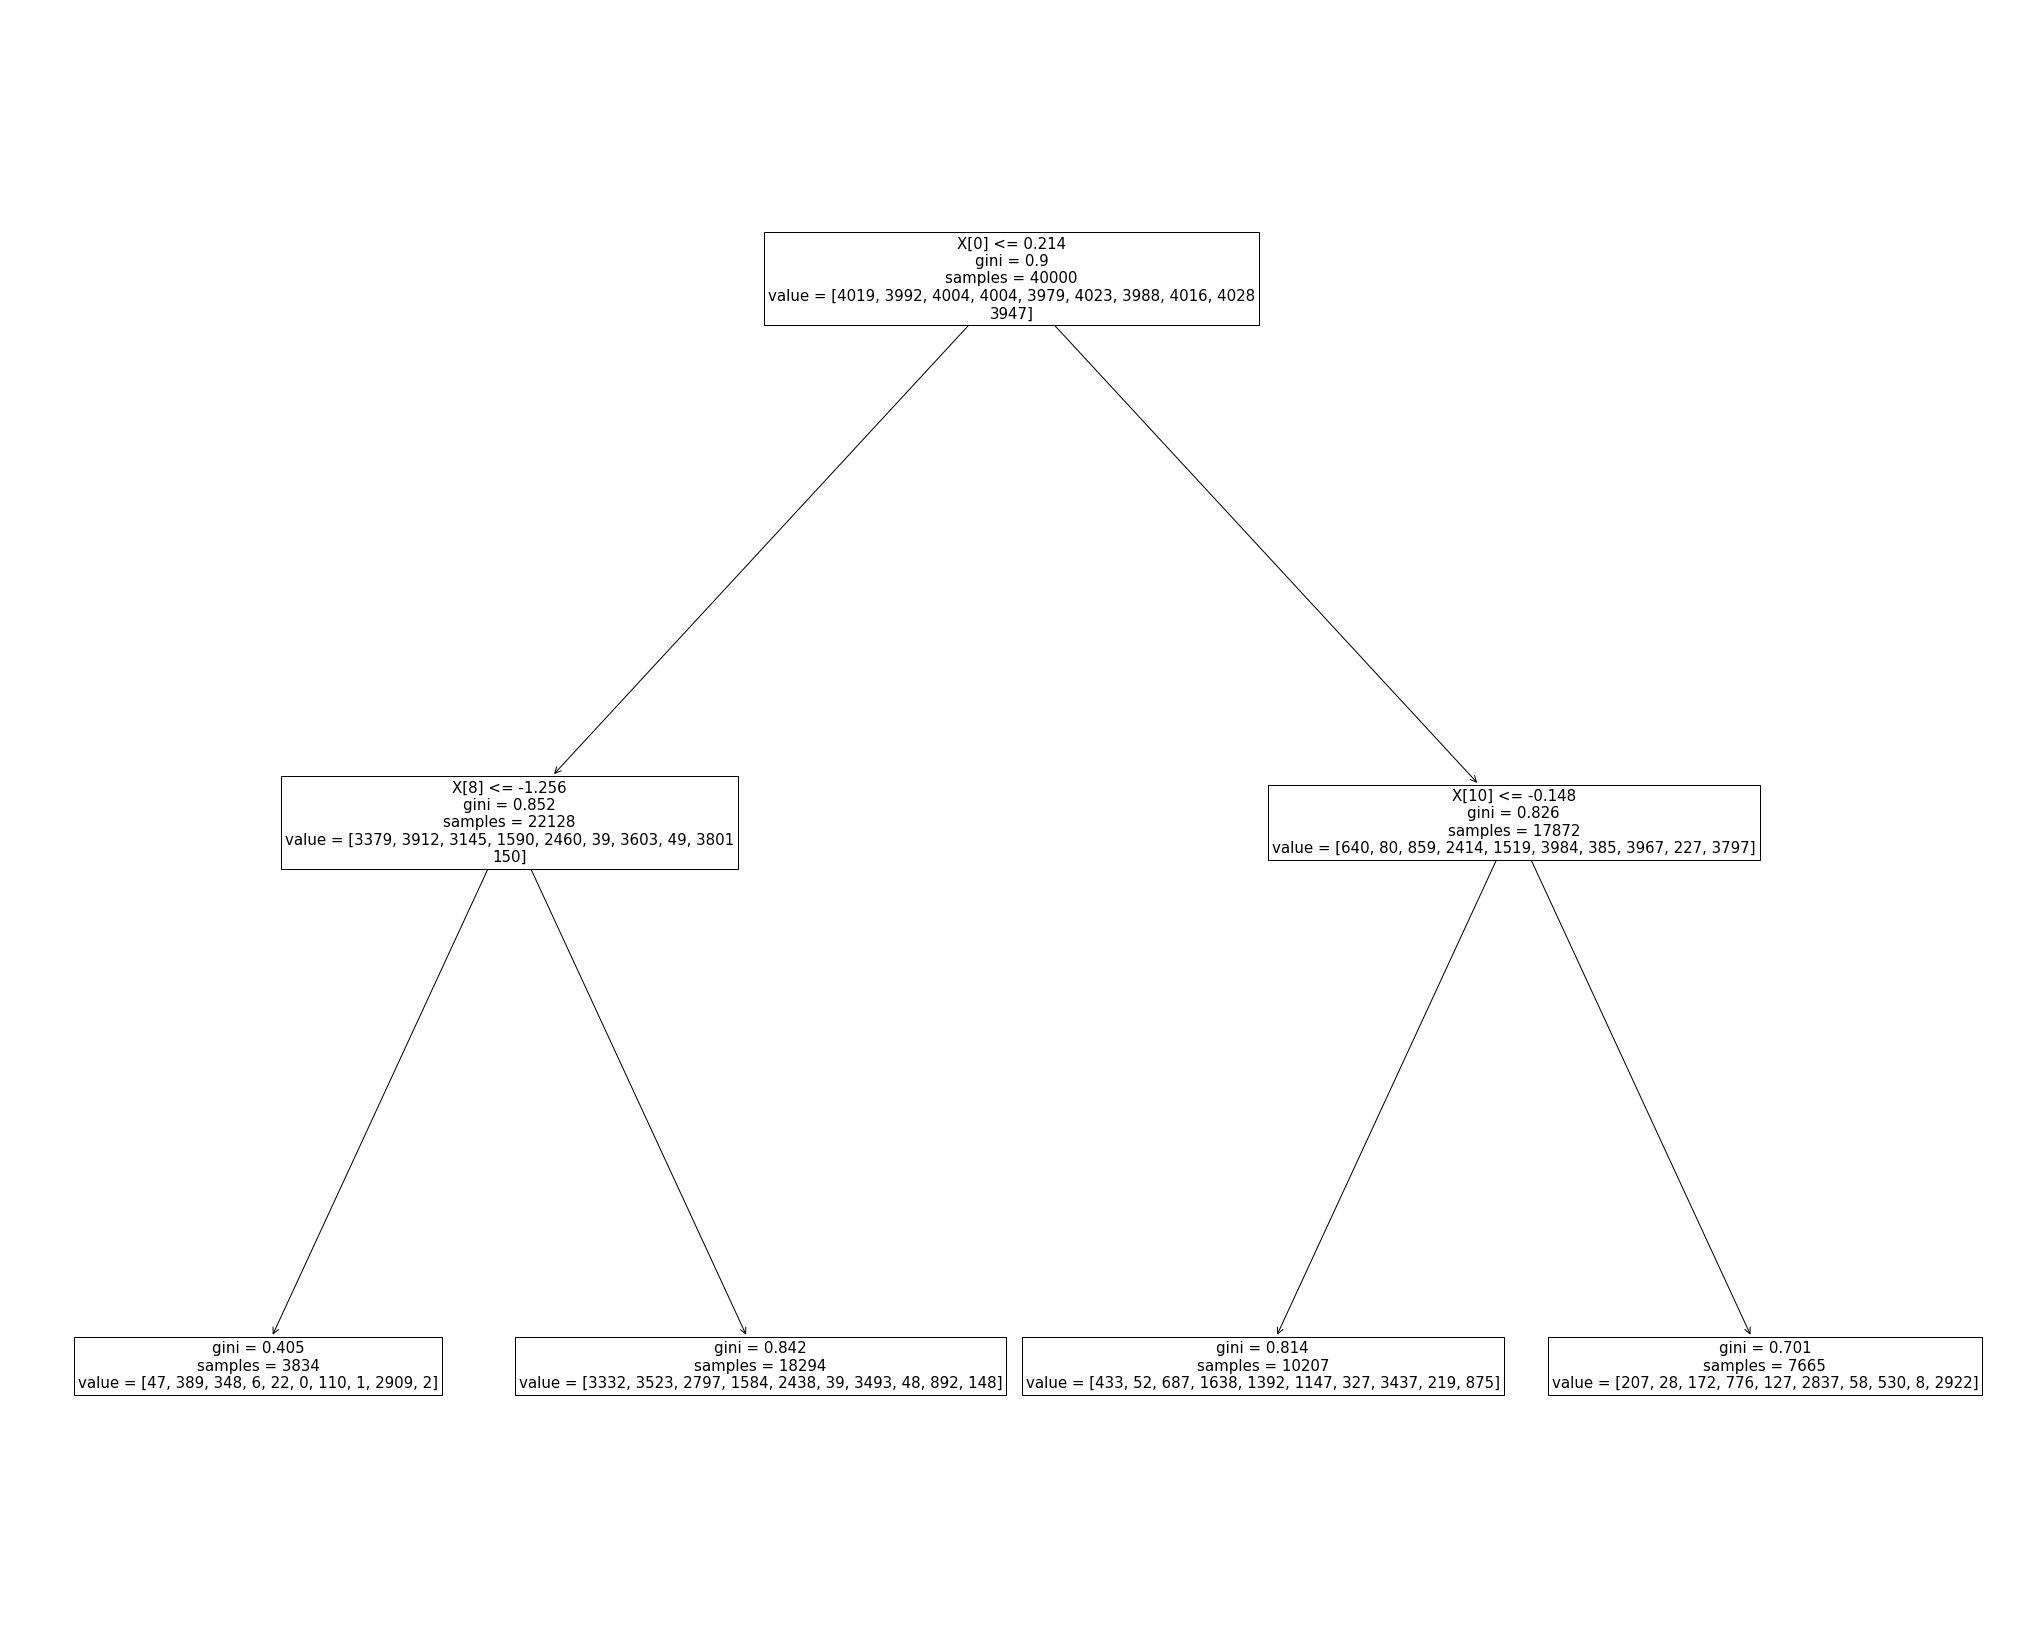

In [10]:
clf = DecisionTreeClassifier(max_depth = 2, random_state = 0)
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

fig, axe = plt.subplots(figsize=(36,30))
tree.plot_tree(clf, ax = axe, fontsize=15)